# Análise do Rheed para obtenção do coeficiente de segregação

Abaixo estão as bibliotecas utilizadas

In [26]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 8

def rheed_model(t, i1, i2, tau):
    """
    RHEED's intensity according to Martini
    """
    return i1 + i2 * np.exp(-t/tau)

Estes dados abaixo se referem a 4 poços quânticos com 10, 15, 21, e 28 monolayers crescidos a 525°C.

Ainda não sabemos se estão na ordem.

In [27]:
rheed_1 = pd.read_csv('rheed/rheed_525_1.dat', sep='\t')
rheed_2 = pd.read_csv('rheed/rheed_525_2.dat', sep='\t')
rheed_3 = pd.read_csv('rheed/rheed_525_3.dat', sep='\t')
rheed_4 = pd.read_csv('rheed/rheed_525_4.dat', sep='\t')

## Análise da Primeira amostra

Vamos ver o perfil da primeira amostra:

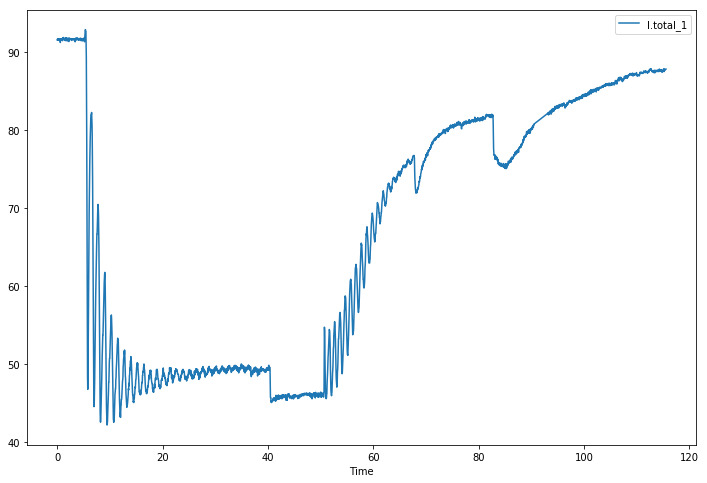

In [28]:
rheed_1.plot(x='Time',y='I.total_1')

Vamos olhar especificamente para este intervalo inicial, que comça em aproximadamente 5 segundos e vai até aproximadamente 40 segundos.

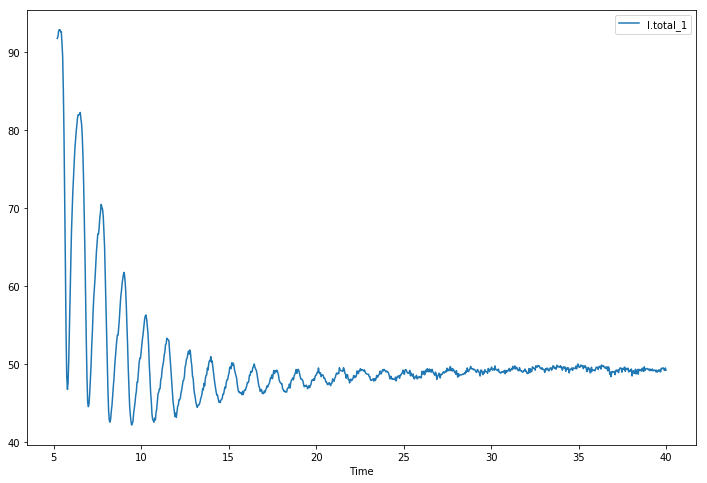

In [29]:
rheed = rheed_1[(rheed_1['Time'] > 5.2) & (rheed_1['Time'] < 40)]
rheed.plot(x='Time',y='I.total_1')

Filtrando somente os pontos máximos de cada oscilação, nós obtemos o perfil a seguir.

Taxa de crescimento: 0.8818 ML/s


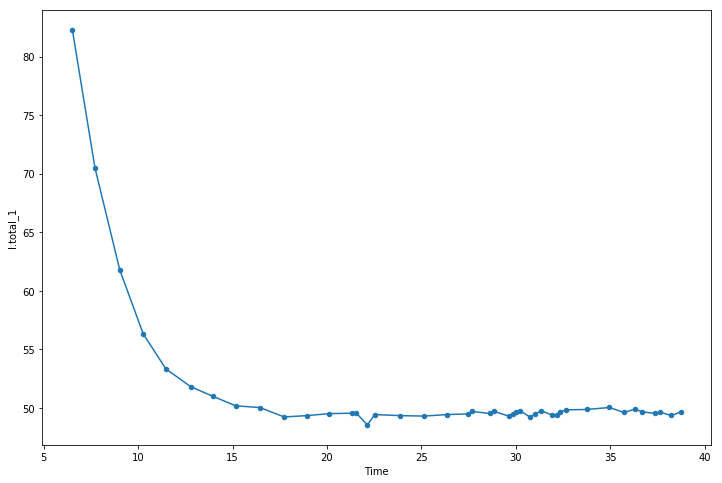

In [30]:
avg = 5
I = rheed['I.total_1'].values
idx = [i for i in range(avg,len(I)-avg) if (np.array(I[i-avg:i])<I[i]).all() and (I[i]>np.array(I[i+1:i+avg])).all()]
rheed_top = rheed.iloc[idx][['Time', 'I.total_1']].dropna()
ax = rheed_top.plot.scatter(x='Time',y='I.total_1')
ax.plot(rheed_top['Time'],rheed_top['I.total_1'])
molayers_rate = rheed_top[rheed_top['Time'] < 21]
MLR = molayers_rate['Time'].shape[0]/np.ptp(molayers_rate['Time'].values)

print("Taxa de crescimento: {0:.4f} ML/s".format(MLR))

Vamos ajustar esta curva usando um modelo:

$$
I(t) = I_1 + I_2 e^{-t/\tau}
$$

que foi proposto por Sandro Martini em sua tese.

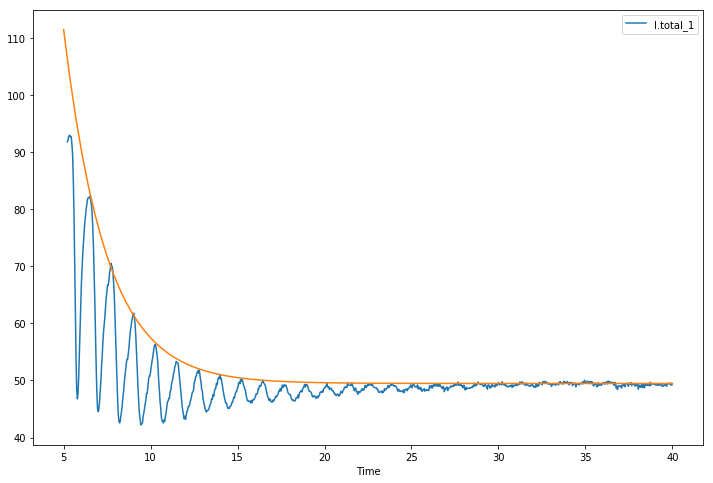

In [31]:
popt, pcov = curve_fit(rheed_model, rheed_top['Time'].values, rheed_top['I.total_1'].values)
i1_adj, i2_adj, tau_adj = popt
rheed_adj = np.vectorize(lambda t: rheed_model(t, *popt))

ax = rheed.plot(x='Time',y='I.total_1')
t = np.linspace(5,40,100)
ax.plot(t, rheed_adj(t))

Parece um bom ajuste. O parametro $\tau$ de interesse tem o valor:

In [32]:
print(r"tau = {0:.4f}".format(tau_adj))

tau = 2.4402


Na tese de Sandro Martini:

$$
R = exp (- 1/ \lambda)
$$

Onde $\lambda$ é o número de monolayers crescidas por segundo multiplicado por $\tau$.

Nosso valor de $\lambda$ é então:

In [33]:
lbda = tau_adj * MLR
print("Lambda: {0:.4f}".format(lbda))

Lambda: 2.1517


E finalmente nosso R:

In [34]:
R = np.exp(-1.0/(tau_adj*MLR))
print("R = {0:.4f}".format(R))

R = 0.6283


## Análise da segunda amostra

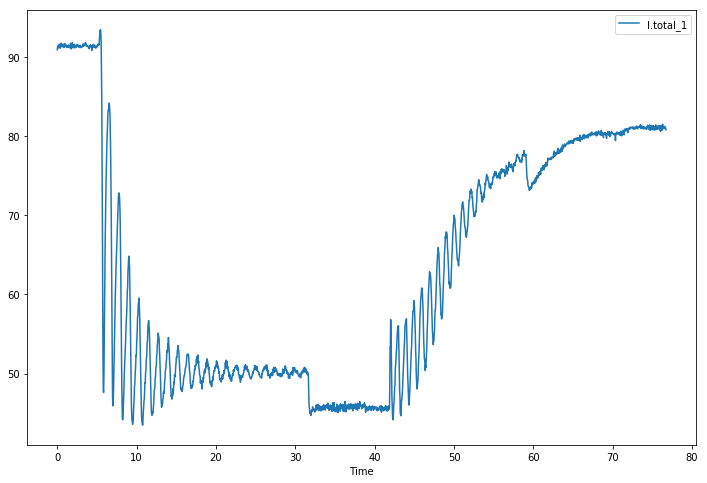

In [35]:
rheed_2.plot(x='Time',y='I.total_1')

/home/thiago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


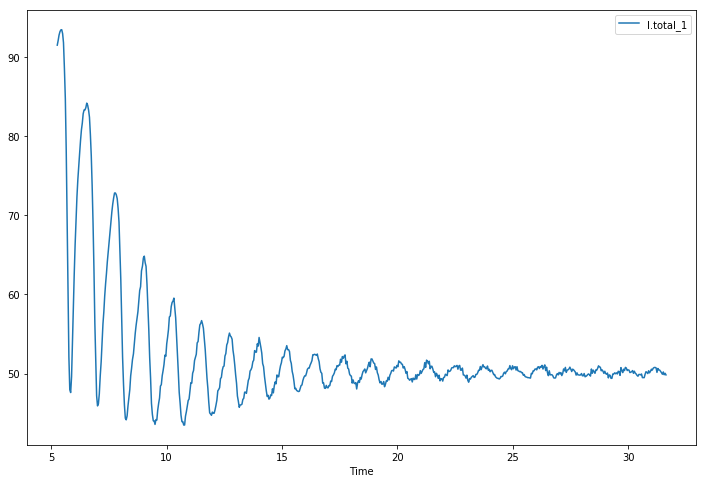

In [36]:
rheed = rheed_2[(rheed_1['Time'] > 5.2) & (rheed_1['Time'] < 31.5)]
rheed.plot(x='Time',y='I.total_1')

Taxa de crescimento: 0.8208 ML/s


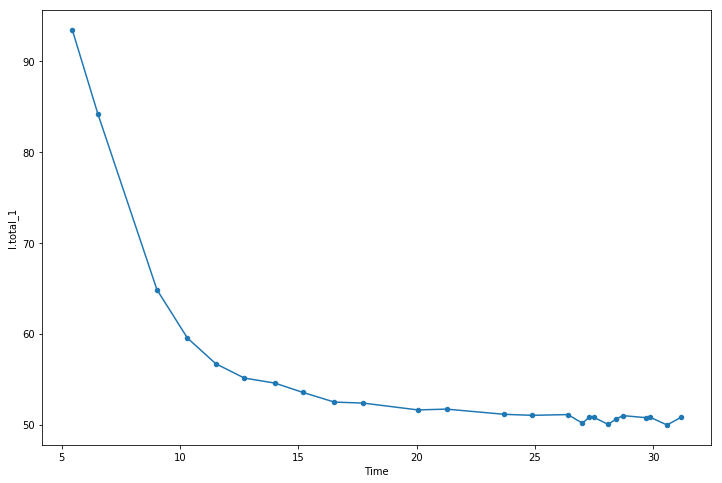

In [37]:
avg = 5
I = rheed['I.total_1'].values
idx = [i for i in range(avg,len(I)-avg) if (np.array(I[i-avg:i])<I[i]).all() and (I[i]>np.array(I[i+1:i+avg])).all()]
rheed_top = rheed.iloc[idx][['Time', 'I.total_1']].dropna()
ax = rheed_top.plot.scatter(x='Time',y='I.total_1')
ax.plot(rheed_top['Time'],rheed_top['I.total_1'])
molayers_rate = rheed_top[(rheed_top['Time'] > 10) & (rheed_top['Time'] < 21)]
MLR = molayers_rate['Time'].shape[0]/np.ptp(molayers_rate['Time'].values)

print("Taxa de crescimento: {0:.4f} ML/s".format(MLR))

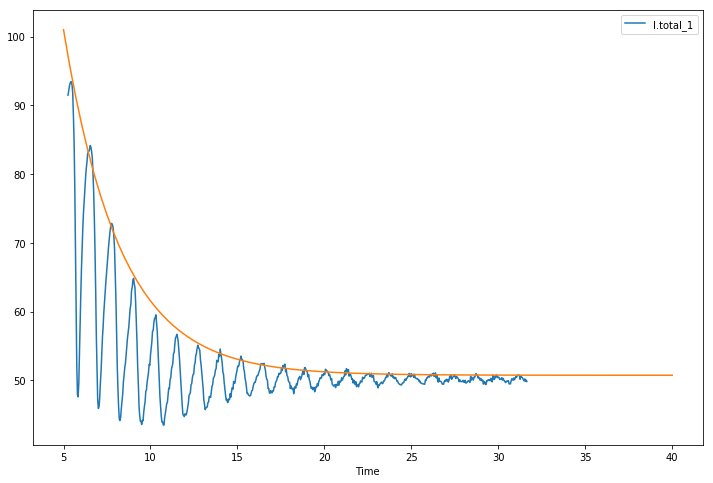

In [38]:
popt, pcov = curve_fit(rheed_model, rheed_top['Time'].values, rheed_top['I.total_1'].values)
i1_adj, i2_adj, tau_adj = popt
rheed_adj = np.vectorize(lambda t: rheed_model(t, *popt))

ax = rheed.plot(x='Time',y='I.total_1')
t = np.linspace(5,40,100)
ax.plot(t, rheed_adj(t))

In [39]:
print(r"tau = {0:.4f} s".format(tau_adj))
lbda = tau_adj * MLR
print("Lambda: {0:.4f} ML".format(lbda))
R = np.exp(-1.0/(tau_adj*MLR))
print("R = {0:.4f}".format(R))

tau = 3.2543 s
Lambda: 2.6710 ML
R = 0.6877


## Análise da terceira amostra

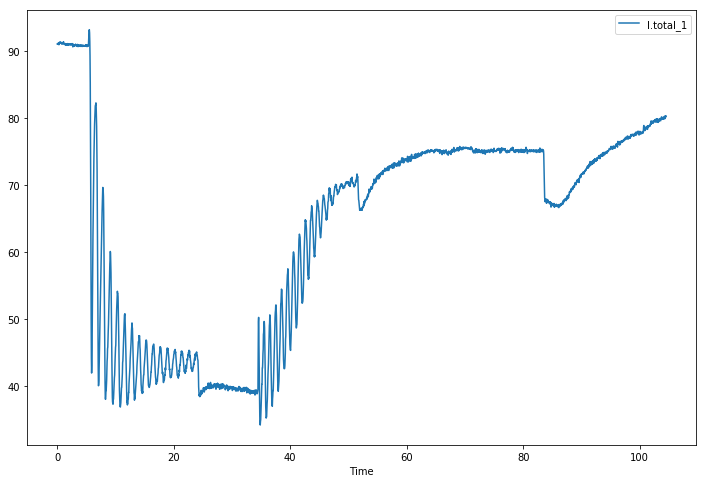

In [40]:
rheed_3.plot(x='Time',y='I.total_1')

/home/thiago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


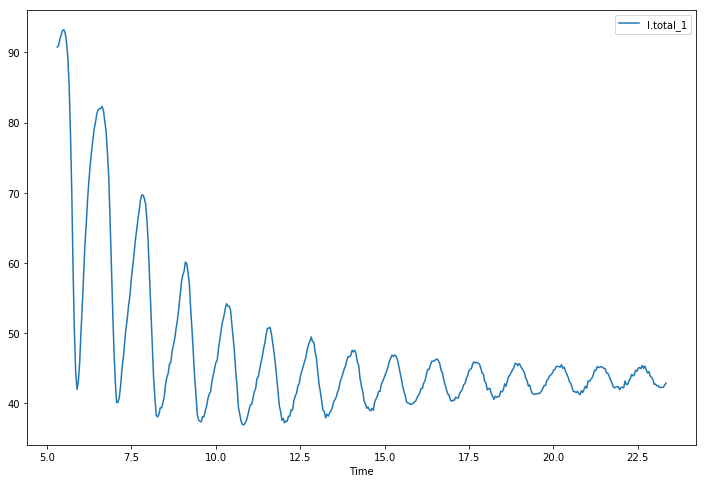

In [41]:
rheed = rheed_3[(rheed_1['Time'] > 5.2) & (rheed_1['Time'] < 23)]
rheed.plot(x='Time',y='I.total_1')

Taxa de crescimento: 0.8761 ML/s


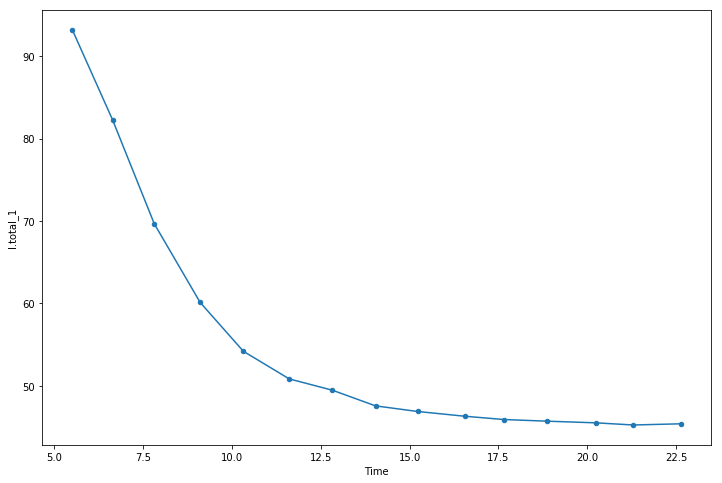

In [42]:
avg = 5
I = rheed['I.total_1'].values
idx = [i for i in range(avg,len(I)-avg) if (np.array(I[i-avg:i])<I[i]).all() and (I[i]>np.array(I[i+1:i+avg])).all()]
rheed_top = rheed.iloc[idx][['Time', 'I.total_1']].dropna()
ax = rheed_top.plot.scatter(x='Time',y='I.total_1')
ax.plot(rheed_top['Time'],rheed_top['I.total_1'])
molayers_rate = rheed_top.copy()
MLR = molayers_rate['Time'].shape[0]/np.ptp(molayers_rate['Time'].values)

print("Taxa de crescimento: {0:.4f} ML/s".format(MLR))

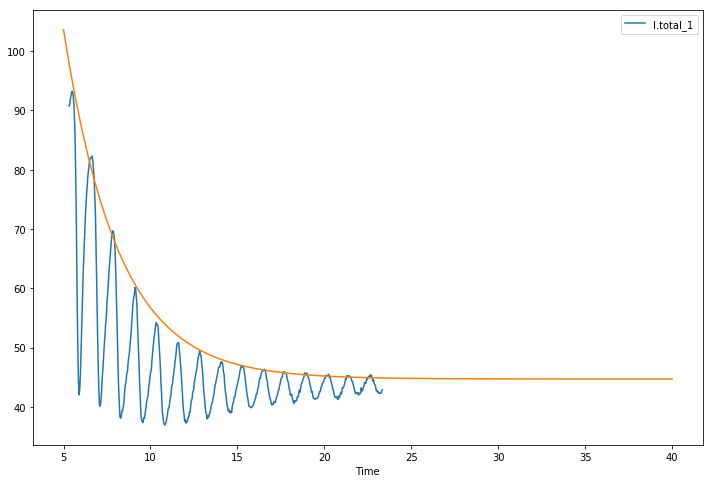

In [43]:
popt, pcov = curve_fit(rheed_model, rheed_top['Time'].values, rheed_top['I.total_1'].values)
i1_adj, i2_adj, tau_adj = popt
rheed_adj = np.vectorize(lambda t: rheed_model(t, *popt))

ax = rheed.plot(x='Time',y='I.total_1')
t = np.linspace(5,40,100)
ax.plot(t, rheed_adj(t))

In [44]:
print(r"tau = {0:.4f} s".format(tau_adj))
lbda = tau_adj * MLR
print("Lambda: {0:.4f} ML".format(lbda))
R = np.exp(-1.0/(tau_adj*MLR))
print("R = {0:.4f}".format(R))

tau = 3.1458 s
Lambda: 2.7559 ML
R = 0.6957


## Análise da quarta amostra

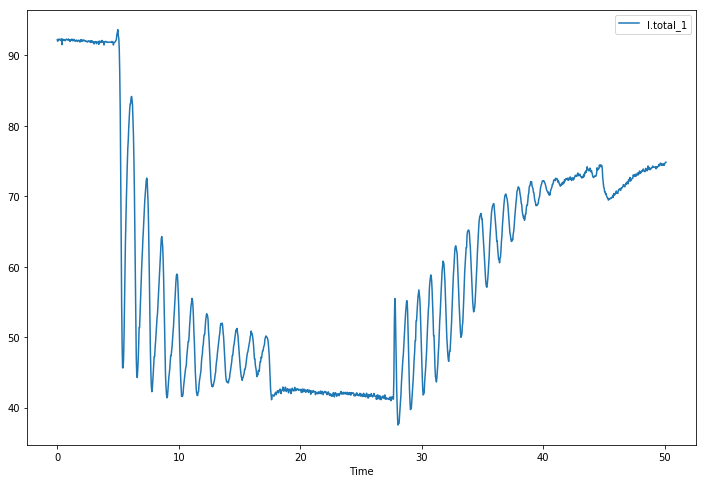

In [45]:
rheed_4.plot(x='Time',y='I.total_1')

/home/thiago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


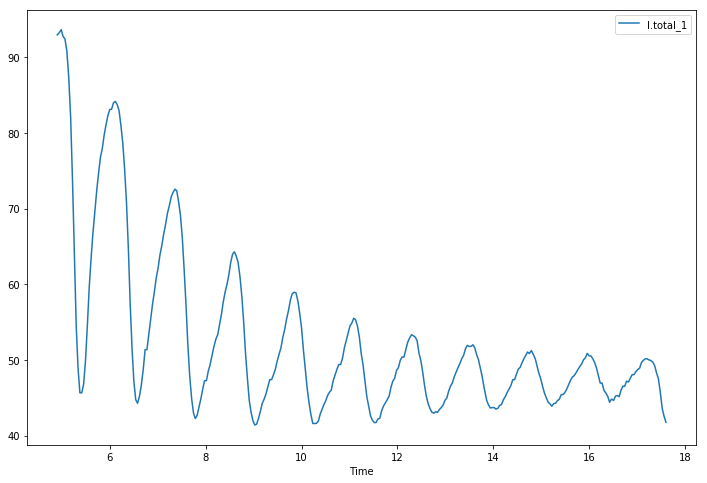

In [46]:
rheed = rheed_4[(rheed_1['Time'] > 4.8) & (rheed_1['Time'] < 17.5)]
rheed.plot(x='Time',y='I.total_1')

Taxa de crescimento: 0.9016 ML/s


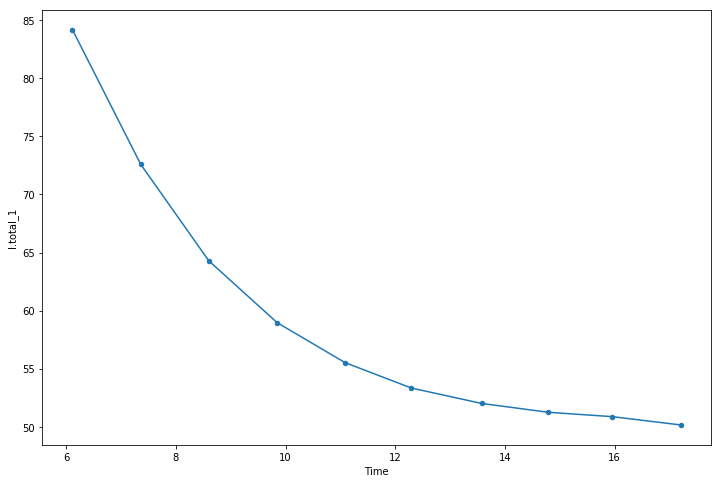

In [47]:
avg = 5
I = rheed['I.total_1'].values
idx = [i for i in range(avg,len(I)-avg) if (np.array(I[i-avg:i])<I[i]).all() and (I[i]>np.array(I[i+1:i+avg])).all()]
rheed_top = rheed.iloc[idx][['Time', 'I.total_1']].dropna()
ax = rheed_top.plot.scatter(x='Time',y='I.total_1')
ax.plot(rheed_top['Time'],rheed_top['I.total_1'])
molayers_rate = rheed_top.copy()
MLR = molayers_rate['Time'].shape[0]/np.ptp(molayers_rate['Time'].values)

print("Taxa de crescimento: {0:.4f} ML/s".format(MLR))

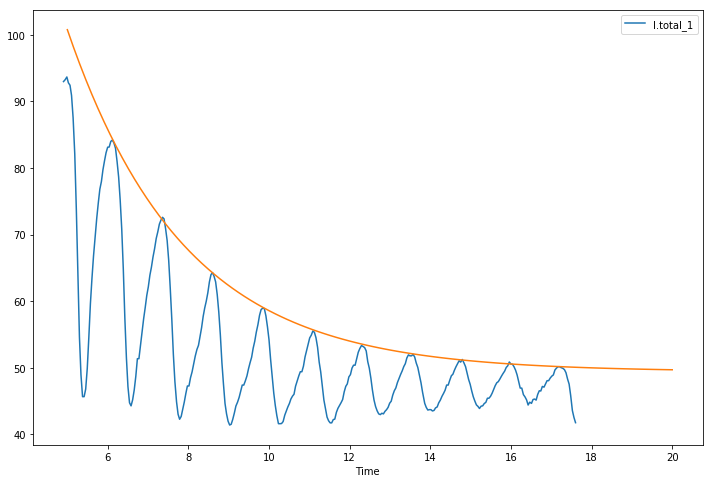

In [48]:
popt, pcov = curve_fit(rheed_model, rheed_top['Time'].values, rheed_top['I.total_1'].values)
i1_adj, i2_adj, tau_adj = popt
rheed_adj = np.vectorize(lambda t: rheed_model(t, *popt))

ax = rheed.plot(x='Time',y='I.total_1')
t = np.linspace(5,20,100)
ax.plot(t, rheed_adj(t))

In [49]:
print(r"tau = {0:.4f} s".format(tau_adj))
lbda = tau_adj * MLR
print("Lambda: {0:.4f} ML".format(lbda))
R = np.exp(-1.0/(tau_adj*MLR))
print("R = {0:.4f}".format(R))

tau = 2.9023 s
Lambda: 2.6165 ML
R = 0.6824
